#  Applied Machine Learning - Programming with Python



### About this :
The main purpose of this assignment is to check whether your programming knowledge is adequate to take this class. This covers two python packages, `numpy` and `pandas`.

Imports
------

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

<br><br>

## Loading files with Pandas


When working with tabular data, you will typically be creating Pandas dataframes by reading data from .csv files using `pd.read_csv()`. The documentation for this function is available [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).

In the "data" folder in this homework repository there are 6 different .csv files named `wine_#.csv/.txt`. Look at each of these files and use `pd.read_csv()` to load these data so that they resemble the following:

| Bottle | Grape | Origin | Alcohol | pH | Colour | Aroma |
| :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| 1 |  Chardonnay | Australia | 14.23 | 3.51 | White | Floral |
| 2 |  Pinot Grigio | Italy | 13.20 | 3.30 | White | Fruity |
| 3 |  Pinot Blanc | France | 13.16 | 3.16 | White | Citrus |
| 4 |  Shiraz | Chile | 14.91 | 3.39 | Red | Berry |
| 5 |  Malbec | Argentina | 13.83 | 3.28 | Red | Fruity |

You are provided with tests that use `df.equals()` to check that all the dataframes are identical. If you're in a situation where the two dataframes look identical but `df.equals()` is returning `False`, it may be an issue of types - try checking `df.index`, `df.columns`, or `df.info()`.

In [3]:
df1 = pd.read_csv("wine_1.csv")
df2 = None
df3 = None
df4 = None
df5 = None
df6 = None

In [4]:
df1

,Bottle,Grape,Origin,Alcohol,pH,Colour,Aroma
0,1,Chardonnay,Australia,14.23,3.51,White,Floral
1,2,Pinot Grigio,Italy,13.20,3.30,White,Fruity
2,3,Pinot Blanc,France,13.16,3.16,White,Citrus
3,4,Shiraz,Chile,14.91,3.39,Red,Berry
4,5,Malbec,Argentina,13.83,3.28,Red,Fruity


In [5]:
for i, df in enumerate([df2, df3, df4, df5, df6]):
    assert df1.equals(df), f"df1 not equal to df{i + 2}"
print("All tests passed.") # Assertion Error arises because all veriables are not equal to df1

AssertionError: df1 not equal to df2

In [6]:
df1

,Bottle,Grape,Origin,Alcohol,pH,Colour,Aroma
0,1,Chardonnay,Australia,14.23,3.51,White,Floral
1,2,Pinot Grigio,Italy,13.20,3.30,White,Fruity
2,3,Pinot Blanc,France,13.16,3.16,White,Citrus
3,4,Shiraz,Chile,14.91,3.39,Red,Berry
4,5,Malbec,Argentina,13.83,3.28,Red,Fruity


<br><br>

##  The Titanic dataset

The file *titanic.csv* contains data of 1309 passengers who were on the Titanic's unfortunate voyage. For each passenger, the following data are recorded:

* survival - Survival (0 = No; 1 = Yes)
* class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* name - Name
* sex - Sex
* age - Age
* sibsp - Number of Siblings/Spouses Aboard
* parch - Number of Parents/Children Aboard
* ticket - Ticket Number
* fare - Passenger Fare
* cabin - Cabin
* embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
* boat - Lifeboat (if survived)
* body - Body number (if did not survive and body was recovered)

In this i will perform a number of wrangling operations to manipulate and extract subsets of the data.

Note: many popular datasets have sex as a feature where the possible values are male and female. This representation reflects how the data were collected and is not meant to imply that, for example, gender is binary.

>Loading the `titanic.csv` dataset into a pandas dataframe named `titanic_df`.

In [7]:
titanic_df = pd.read_csv("titanic.csv")



In [8]:
assert set(titanic_df.columns) == set(
    [
        "pclass",
        "survived",
        "name",
        "sex",
        "age",
        "sibsp",
        "parch",
        "ticket",
        "fare",
        "cabin",
        "embarked",
        "boat",
        "body",
        "home.dest",
    ]
), "All required columns are not present"
assert len(titanic_df.index) == 1309, "Wrong number of rows in dataframe"
print("Success")

Success


>The column names `sibsp` and `parch` are not very descriptive. Use `df.rename()` to rename these columns to `siblings_spouses` and `parents_children` respectively.

In [9]:
titanic_df.rename(columns={"parch" : "parents_children"}, inplace=True)
titanic_df.rename(columns={"sibsp" : "siblings_spouses"}, inplace=True)

In [10]:
assert set(["siblings_spouses", "parents_children"]).issubset(
    titanic_df.columns
), "Column names were not changed properly"
print("Success")

Success


>We will practice indexing different subsets of the dataframe in the following questions.
Selecting the column `age` using single bracket notation `[]`. What type of object is returned?

In [11]:
(titanic_df["age"])

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1304    14.5000
1305        NaN
1306    26.5000
1307    27.0000
1308    29.0000
Name: age, Length: 1309, dtype: float64

>Now select the `age` using double bracket notation `[[]]`. What type of object is returned?

In [15]:
(titanic_df[["age"]])

,age
0,29.0000
1,0.9167
2,2.0000
3,30.0000
4,25.0000
...,...
1304,14.5000
1305,NaN
1306,26.5000
1307,27.0000


>Select the columns `pclass`, `survived`, and `age` using a single line of code.

In [12]:
titanic_df[["pclass", "survived", "age"]]

,pclass,survived,age
0,1,1,29.0000
1,1,1,0.9167
2,1,0,2.0000
3,1,0,30.0000
4,1,0,25.0000
...,...,...,...
1304,3,0,14.5000
1305,3,0,NaN
1306,3,0,26.5000
1307,3,0,27.0000


>Using the `iloc` method to obtain the first 5 rows of the columns `name`, `sex` and `age` using a single line of code.

In [13]:
titanic_df[["name","sex","age"]].iloc[:5]

,name,sex,age
0,"Allen, Miss. Elisabeth Walton",female,29.0000
1,"Allison, Master. Hudson Trevor",male,0.9167
2,"Allison, Miss. Helen Loraine",female,2.0000
3,"Allison, Mr. Hudson Joshua Creighton",male,30.0000
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000


>Now applying the `loc` method to obtain the first 5 rows of the columns `name`, `sex` and `age` using a single line of code.

In [14]:
titanic_df[["name","sex","age"]].iloc[:5]

,name,sex,age
0,"Allen, Miss. Elisabeth Walton",female,29.0000
1,"Allison, Master. Hudson Trevor",male,0.9167
2,"Allison, Miss. Helen Loraine",female,2.0000
3,"Allison, Mr. Hudson Joshua Creighton",male,30.0000
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000


In [15]:
titanic_df

,pclass,survived,name,sex,age,siblings_spouses,parents_children,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


>How many passengers survived (`survived = 1`) the disaster? 
Using `df.query()` or `[]` notation to subset the dataframe and then `df.shape` to check its size.

In [16]:
titanic_df.query("survived == 1 ").shape

(500, 14)

In [17]:
titanic_df

,pclass,survived,name,sex,age,siblings_spouses,parents_children,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


>How many passengers that survived the disaster (`survived = 1`) were over 60 years of age?

In [18]:
titanic_df.query("survived == 1 " and "age>60 ").shape

(33, 14)

>What was the lowest and highest fare paid to board the titanic? 
Storing the answers as floats in the variables `lowest` and `highest`.

In [19]:
lowest = None
highest = None


Sorting the dataframe by fare paid (most to least).

In [20]:
titanic_fares = titanic_df.sort_values("fare", ascending = False)

>Saving the sorted dataframe to a .csv file called 'titanic_fares.csv' using `to_csv()`.

In [21]:
titanic_fares.to_csv("titanic_fares")

>Creating a scatter plot of fare (y-axis) vs. age (x-axis). Make sure to follow the [guidelines on figures](https://github.com/UBC-CS/cpsc330/blob/master/docs/homework_instructions.md#figures). Using pandas built-in plotting or `matplotlib`. 

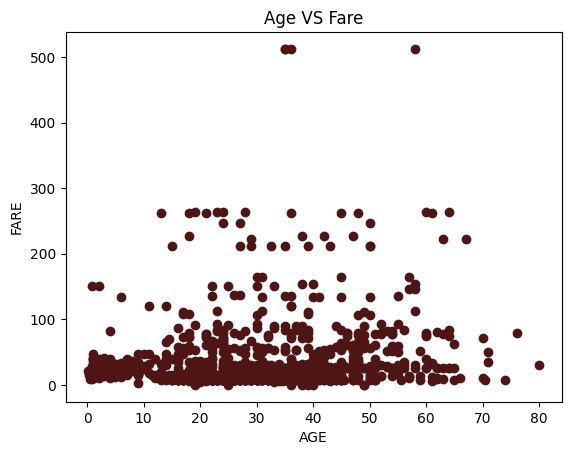

In [26]:
plt.scatter(y=titanic_df["fare"], x=titanic_df["age"],c="#4f1515")
plt.xlabel("AGE")
plt.ylabel("FARE")
plt.title("Age VS Fare")
plt.show()

>Creating a bar plot of `embarked` values. 


In [38]:
binary_s = titanic_df["embarked"].apply(lambda x:1 if x=="S" else 0)
binary_s.sum()

914

In [36]:
binary_c = titanic_df["embarked"].apply(lambda x:1 if x=="C" else 0)

In [39]:
binary_c.sum()

270

<BarContainer object of 1309 artists>

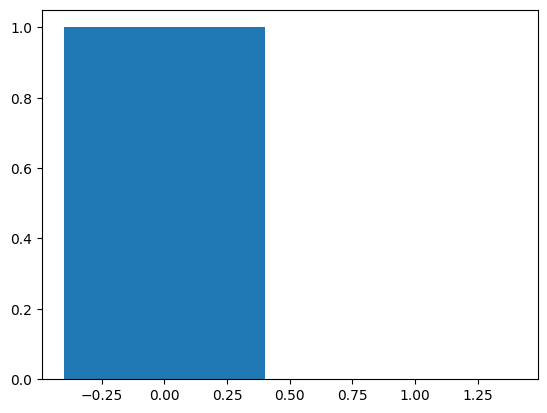

In [41]:
plt.bar(x=binary_s, height=binary_c)

<br><br>

## Treasure Hunt

In this , we will generate various collections of objects either as a list, a tuple, or a dictionary. Now i have to inspect the objects and look for treasure, which in our case is a particular object: **the character "T"**. 

**tasks:**

For each of the following cases, index into the Python object to obtain the "T" (for Treasure). 

> I am not modify the original line of code that generates `x` (though you are welcome to copy it). You are welcome to answer this question "manually" or by writing code - whatever works for you. However, your submission should always end with a line of code that prints out `'T'` at the end (because you've found it). 

In [22]:
import string

letters = string.ascii_uppercase

The first one is done for you as an example.

#### Example question

In [23]:
x = ("nothing", {-i: l for i, l in enumerate(letters)})
x

('nothing',
 {0: 'A',
  -1: 'B',
  -2: 'C',
  -3: 'D',
  -4: 'E',
  -5: 'F',
  -6: 'G',
  -7: 'H',
  -8: 'I',
  -9: 'J',
  -10: 'K',
  -11: 'L',
  -12: 'M',
  -13: 'N',
  -14: 'O',
  -15: 'P',
  -16: 'Q',
  -17: 'R',
  -18: 'S',
  -19: 'T',
  -20: 'U',
  -21: 'V',
  -22: 'W',
  -23: 'X',
  -24: 'Y',
  -25: 'Z'})

**Example answer**:

In [24]:
x[1][-19]

'T'

> Note: In these questions, the goal is not to understand the code itself, which may be confusing. Instead, try to probe the types of the various objects. For example `type(x)` reveals that `x` is a tuple, and `len(x)` reveals that it has two elements. Element 0 just contains "nothing", but element 1 contains more stuff, hence `x[1]`. Then we can again probe `type(x[1])` and see that it's a dictionary. If you `print(x[1])` you'll see that the letter "T" corresponds to the key -19, hence `x[1][-19]`.

In [ ]:
# Do not modify this cell
x = [
    [letters[i] for i in range(26) if i % 2 == 0],
    [letters[i] for i in range(26) if i % 2 == 1],
]

In [ ]:
# Do not modify this cell
np.random.seed(1)
x = np.random.choice(list(set(letters) - set("T")), size=(100, 26), replace=True)
x[np.random.randint(100), np.random.randint(26)] = "T"

In [ ]:
# Do not modify this cell
n = 26
x = dict()
for i in range(n):
    x[string.ascii_lowercase[i]] = {
        string.ascii_lowercase[(j + 1) % n]: [[letters[j]] if j - 2 == i else None]
        for j in range(n)
    }